## Testing and comparing thermobarometers on an experimental dataset
- This notebook was developed for the 2024 USGS Petrology workshop
- It shows how to perform Cpx-only, Cpx-Liq and Liq-only based thermobarometry calculations on new experimental test data compiled in Wieser et al. (2023) - https://doi.org/10.31223/X59655
- Please try running up to cell 3 before the tutorial!

In [1]:
# First, you need to install Thermobar - You only need to run this once per computer - once you've run it, add a # infront!
!pip install Thermobar

In [2]:
# Now import it and check version
import Thermobar as pt
print(pt.__version__)
# lets import other python things too
import numpy as np
# Pandas is like spreadsheets in python
import pandas as pd
# Lets get it to display all pandas columns
pd.set_option('display.max_columns', None)
# This is for plotting
import matplotlib.pyplot as plt

1.0.38


In [4]:
# Lets load the data - You need to make sure the excel spreadsheet is in the same folder as the notebook. 
out=pt.import_excel('ArcPL_Filtered_Dataset.xlsx', sheet_name='Sheet1')
# This loads all columns you have inputted
all_input=out['my_input']
# This pulls out just Cpxs - E.g. columns with _Cpx and _Liq after
Cpx=out['Cpxs']
Liq=out['Liqs']

In [5]:
# You should also check that things have loaded in how you expect - e.g. looking for columns full of zeros!
Cpx.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,50.3,0.42,5.19,8.88,0.08,16.0,18.9,0.24,0.01,0.0,0
1,52.0,0.34,4.40,8.87,0.23,16.4,17.5,0.22,0.01,0.0,1
2,50.8,0.35,4.84,9.12,0.20,17.0,17.4,0.27,0.01,0.0,2
3,50.2,0.44,5.88,9.60,0.20,16.4,16.9,0.30,0.01,0.0,3
4,49.0,0.47,6.89,10.50,0.21,15.4,17.3,0.34,0.01,0.0,4


In [6]:
# Lets check the liquids too
Liq.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,53.2,0.90,16.8,10.7,0.08,5.97,9.88,2.07,0.42,0.0,0.0,2.7,0.0,0.0,0.0,0.0,0
1,51.6,1.06,16.3,11.8,0.16,6.50,9.89,2.18,0.44,0.0,0.0,1.6,0.0,0.0,0.0,0.0,1
2,53.4,1.03,16.6,10.4,0.20,6.06,9.49,2.30,0.52,0.0,0.0,1.6,0.0,0.0,0.0,0.0,2
3,51.6,0.93,17.5,11.1,0.16,6.21,9.73,2.30,0.46,0.0,0.0,1.6,0.0,0.0,0.0,0.0,3
4,51.6,1.05,17.0,12.0,0.17,5.99,9.59,2.13,0.48,0.0,0.0,1.6,0.0,0.0,0.0,0.0,4


## Lets calculate some liquid-only temperatures first

In [46]:
# We find that this adapted ol-liq thermometer that uses calculated DMg values from Beattie is the best all around performer!
# Here, we are using a pressure of 5 kbar
Temp_Eq22_Put=pt.calculate_liq_only_temp(liq_comps=Liq, equationT='T_Put2008_eq22_BeattDMg', P=5)
Temp_Eq22_Put

0      1394.938741
1      1433.292154
2      1418.860290
3      1423.579308
4      1420.854804
          ...     
209    1299.482386
210    1275.791408
211    1170.285178
212    1201.556469
213    1174.605456
Length: 214, dtype: float64

In [47]:
# If you love excel, you can copy at this point to your clipboard!
Temp_Eq22_Put.to_clipboard(excel=True, index=False)

In [49]:
# Or simply append onto your dataframe, and save
# Adding the new column
all_input['Temp_Puteq22']=Temp_Eq22_Put
# Saving to excel
all_input.to_excel('USGS_thermobarometry_output.xlsx')

In [45]:
# Try with your fav equation
help(pt.calculate_liq_only_temp)

Help on function calculate_liq_only_temp in module Thermobar.liquid_thermometers:

calculate_liq_only_temp(*, liq_comps, equationT, P=None, H2O_Liq=None, print=False)
     Liquid-only thermometery. Returns a temperature in Kelvin.
    
    Parameters
     -------
    
     liq_comps: pandas.DataFrame
         liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
     equationT: str
         If has _sat at the end, represents the saturation surface of that mineral.
    
         Equations from Putirka et al. (2016).
             | T_Put2016_eq3_amp_sat (saturation surface of amphibole)
    
         Equations from Putirka (2008) and older studies:
    
             | T_Put2008_eq13
             | T_Put2008_eq14
             | T_Put2008_eq15
             | T_Put2008_eq16
             | T_Put2008_eq34_cpx_sat
             | T_Put2008_eq28b_opx_sat
             | T_Put1999_cpx_sat
             * Following 3 thermometers are adaptations of olivine-liquid thermometers with  DM

## Perform calculations  by iterating a thermometer and a barometer
- How do you know what options are in Thermobar? You can look at the help function! It tells you what all the different equations are called

## Calc 1 - Using Neave and Putirka (2017) and Putirka (2008) eq33

In [7]:
# This calculation uses pre-matched Cpx and Liq pairs from these experiments
Neave17=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx, liq_comps=Liq, equationP='P_Neave2017',
                                   equationT='T_Put2008_eq33')
Neave17.head()

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,3.286774,1383.752613,0.0,0.0
1,3.085978,1401.973136,0.0,0.0
2,4.021323,1413.717647,0.0,0.0
3,5.858916,1424.378793,0.0,0.0
4,6.662773,1427.813893,0.0,0.0


### Lets compare this to experimental pressures!
- you can check out columns you loaded in using .head()

In [10]:
# Remember, all_input was the thing returned that had all your entered columns - 'P_kbar_x' gives the experimental pressure
all_input.head()

,Unnamed: 0.1,Unnamed: 0,Experiment_x,Citation_x,SiO2_Cpx,TiO2_Cpx,TiO2_Cpx_Err,Al2O3_Cpx,Al2O3_Cpx_Err,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,Na2O_Cpx_Err,K2O_Cpx,Cr2O3_Cpx,P2O5_Cpx,T_K_x,P_kbar_x,Duration_x,Laboratory_x,N_meas_Cpx,Total_Cpx,Experiment_long,Experiment_P_Name_x,Experiment_y,Citation_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Total,Total_Liq,T_K_y,P_kbar_y,Duration_y,Laboratory_y,H2O_Liq_Method,logfo2,N_meas_Liq,DeltaNNO,Total.1,Total_Test,N_meas_Glass,FeO_Liq,N_meas_Amp,Experiment_P_Name_y
0,0,367,502NNOp1,Hamada2008_notinLEPR,50.3,0.42,0,5.19,0,8.88,0.08,16.0,18.9,0.24,0,0.01,0.0,0.0,1373.15,3.0,0,Tokyo,8,100.03,Hamada502NNOp1,Hamada3.0,502NNOp1,Hamada2008_notinLEPR,53.2,0.90,16.8,10.7,0.08,5.97,9.88,2.07,0.42,0.0,0.0,2.7,100.02,95.09,1373.15,3.0,24.0,Tokyo,FTIR,-7.594871,12,0,0.0,0.0,0,0.0,0,Hamada3.0
1,1,368,911NNOp1,Hamada2008_notinLEPR,52.0,0.34,0,4.40,0,8.87,0.23,16.4,17.5,0.22,0,0.01,0.0,0.0,1403.15,4.0,0,Tokyo,7,99.47,Hamada911NNOp1,Hamada4.0,911NNOp1,Hamada2008_notinLEPR,51.6,1.06,16.3,11.8,0.16,6.50,9.89,2.18,0.44,0.0,0.0,1.6,99.93,97.35,1403.15,4.0,24.0,Tokyo,FTIR,-7.276066,7,0,0.0,0.0,0,0.0,0,Hamada4.0
2,2,369,948NNOp1,Hamada2008_notinLEPR,50.8,0.35,0,4.84,0,9.12,0.20,17.0,17.4,0.27,0,0.01,0.0,0.0,1393.15,4.0,0,Tokyo,10,99.52,Hamada948NNOp1,Hamada4.0,948NNOp1,Hamada2008_notinLEPR,53.4,1.03,16.6,10.4,0.20,6.06,9.49,2.30,0.52,0.0,0.0,1.6,100.00,95.75,1393.15,4.0,24.0,Tokyo,FTIR,0.000000,8,0,0.0,0.0,0,0.0,0,Hamada4.0
3,3,374,822NNOp1,Hamada2008_notinLEPR,50.2,0.44,0,5.88,0,9.60,0.20,16.4,16.9,0.30,0,0.01,0.0,0.0,1463.15,7.0,0,Tokyo,7,100.28,Hamada822NNOp1,Hamada7.0,822NNOp1,Hamada2008_notinLEPR,51.6,0.93,17.5,11.1,0.16,6.21,9.73,2.30,0.46,0.0,0.0,1.6,99.99,97.08,1463.15,7.0,12.0,Tokyo,FTIR,0.000000,6,0,0.0,0.0,0,0.0,0,Hamada7.0
4,4,375,820NNOp1,Hamada2008_notinLEPR,49.0,0.47,0,6.89,0,10.50,0.21,15.4,17.3,0.34,0,0.01,0.0,0.0,1433.15,7.0,0,Tokyo,6,100.23,Hamada820NNOp1,Hamada7.0,820NNOp1,Hamada2008_notinLEPR,51.6,1.05,17.0,12.0,0.17,5.99,9.59,2.13,0.48,0.0,0.0,1.6,100.01,96.76,1433.15,7.0,12.0,Tokyo,FTIR,0.000000,8,0,0.0,0.0,0,0.0,0,Hamada7.0


Text(0, 0.5, 'Calc P kbar (NP17-Eq33)')

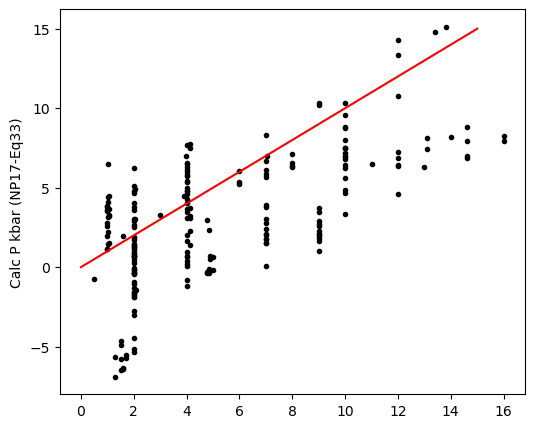

In [13]:
# This line sets up a plot with 1 subplot, that is 6 units by 5 units in size. 
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))
# This plots experimental pressure vs. Calculated pressure
ax1.plot(all_input['P_kbar_x'], Neave17['P_kbar_calc'], '.k')
# Now add a 1:1 line to compare!
ax1.plot([0, 15], [0, 15], '-r')
# Here is how you add a Y label - Try adding an X
ax1.set_ylabel('Calc P kbar (NP17-Eq33)')
# Add your own x label here! - X is experimental pressure



### Now do the same for Temperature 

In [10]:
# Try typing code here to make a plot! You need to replace P_kbar with T_K at every point



### Scroll down for answers (only after you have tried!)
-
-
-
-
-
-
-
-
-
-
-
-


Text(0, 0.5, 'Calc T (°C)')

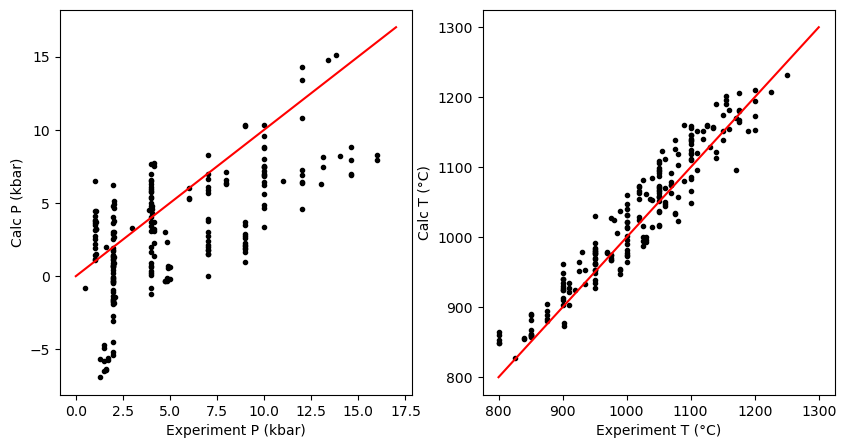

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(all_input['P_kbar_x'], Neave17['P_kbar_calc'], '.k')
ax1.plot([0, 17], [0, 17], '-r')
ax1.set_xlabel('Experiment P (kbar)')
ax1.set_ylabel('Calc P (kbar)')

ax2.plot(all_input['T_K_x']-273.15, Neave17['T_K_calc']-273.15, '.k')
ax2.plot([800, 1300], [800, 1300], '-r')
ax2.set_xlabel('Experiment T (°C)')
ax2.set_ylabel('Calc T (°C)')


### What can we say about the relative success of thermobarometers vs. barometers? What does this maybe mean thermodynamically?

In [15]:
## What if we want to calculate some statistics? Here, we can do a linear regression between exp pressure vs. calc pressure
pt.calculate_R2(all_input['P_kbar_x'], Neave17['P_kbar_calc'], xy=False)

{'R2': '0.42',
 'RMSE': '3.92',
 'RMSE_num': 3.92037,
 'P_val': '0.000',
 'Median': '-1.98',
 'Mean': '-2.12',
 'Int': array([-0.33254605]),
 'Grad': array([0.65841048])}

### Now do the same calculation for temperature!

In [16]:
# write some code here!


### What does a RMSE of 3.92 kbar mean in terms of depth in the crust (choose your favourite crustal density value!)



In [17]:
# type your working here! Remember, P = rho * g *H


### Scroll down for an inbuilt function to do this (once you've had a go!)
-
-
-
-
-
-
-
-
-
-
-
-


In [18]:
# Lets use a fixed crustal density profile
Depth1=pt.convert_pressure_to_depth(P_kbar=3.92, crust_dens_kgm3=2700)
Depth1

0    14.799713
dtype: float64

In [25]:
help(pt.convert_pressure_to_depth)

Help on function convert_pressure_to_depth in module Thermobar.density_profiles:

convert_pressure_to_depth(P_kbar=None, crust_dens_kgm3=None, g=9.81, d1=None, d2=None, rho1=None, rho2=None, rho3=None, model=None)
    Converts pressure in kbar to depth in km using a variety of crustal density profiles
    
    
    Parameters
    -----------
    
    P_kbar: int, float, pd.Series, np.ndarray
        Pressure in kbar
    
    g: float
        gravitational constant, in m/s2
    
    crust_dens_kgm3: float or str
        If float: Crustal density in kg/m3
    
        If model, choose from:
    
        ryan_lerner:
            Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
            After 16.88 km (455 MPa), assume density is 2.746, as density turns around again. This profile is tweaked for Hawaii
    
        mavko_debari:
            Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011)
            as given in Putirka (2017) Down the Crat

In [19]:
# Lots of different options for profiles with the pressures we calculated with Neave
Depth_P=pt.convert_pressure_to_depth(P_kbar=Neave17['P_kbar_calc'], 
                                        crust_dens_kgm3='prezzi')
Depth_P

0      12.756560
1      12.012375
2      15.469509
3      22.191635
4      25.103146
         ...    
209    29.768622
210    30.808585
211    30.352143
212    32.880248
213    26.231000
Length: 214, dtype: float64

## Calc 2 - Now try calculations using Putirka (2003) for both T and P. Read the documentation above to find out what these are called. Or go here 
- https://github.com/PennyWieser/Thermobar/blob/main/docs/img/All_Phases_Docs_Merged.pdf

In [17]:
# how do the Ts compare to the ones above with eq33?


## Calc 3 - But how do we know if the Cpx-Liq pairs are actually in equilibrium?
- You can ask Thermobar to perform the common equilibrium tests for you! 

In [20]:
Neave17_Eqtest=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx, liq_comps=Liq, equationP='P_Neave2017',
                                   equationT='T_Put2008_eq33', eq_tests=True)
Neave17_Eqtest.head()

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_P_kbar_Iter,Delta_T_K_Iter,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Sample_ID_Liq,Sample_ID_Cpx,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,3.286774,1383.752613,False,0.0,0.0,0.050230,0.166676,0.020686,0.042074,0.044042,0.018405,0.108575,0.0,0.018178,53.2,0.90,16.8,10.7,0.08,5.97,9.88,2.07,0.42,0.0,0.0,2.7,0.0,0.0,0.0,0.0,0.562645,0.094125,0.000717,0.094637,0.111957,0.104703,0.021223,0.002833,0.007160,0.0,0.0,0.498463,0.083388,0.000635,0.083842,0.099186,0.185519,0.037604,0.005020,0.006343,0.0,0.0,0.498635,0.498635,50.3,0.42,5.19,8.88,0.08,16.0,18.9,0.24,0.01,0.0,1.860176,0.882093,0.274634,0.748895,0.226209,0.017209,0.000472,0.002506,0.011683,0.0,0.0,0.139824,0.086385,0.462890,0.144118,0.392992,4.023877,0.392992,0.047282,0.227353,0.172162,0.0,0.204960,0.762570,0.017209,0,0.069176,0.035324,0.644395,0.256166,0.644395,0.490338,0.047282,0.227353,0.309659,0.256347,0.309659,2.295339,-2.756812,-2.756812,0.250838,0.498635,0.498635,0.058821,0,0,0.259429,0.142983,-0.050230,0.752970,0.108575,0.625759,0.018635,0.662799,0.018405,0.298241,0.042074,0.235480,-0.020686,0.025135,-0.044042,0.0,0.0,0.017146,0.018178,0.009420,0.007789,0.007789
1,3.085978,1401.973136,False,0.0,0.0,0.034277,0.150916,0.001767,0.069953,0.057070,0.032134,0.086081,0.0,0.014538,51.6,1.06,16.3,11.8,0.16,6.50,9.89,2.18,0.44,0.0,0.0,1.6,0.0,0.0,0.0,0.0,0.544953,0.102337,0.001431,0.104219,0.111913,0.101443,0.022319,0.002964,0.008421,0.0,0.0,0.483660,0.090826,0.001270,0.092497,0.099325,0.180067,0.039618,0.005261,0.007474,0.0,0.0,0.495435,0.495435,52.0,0.34,4.40,8.87,0.23,16.4,17.5,0.22,0.01,0.0,1.910344,0.898174,0.272513,0.688842,0.190510,0.015670,0.000469,0.007157,0.009395,0.0,0.0,0.089656,0.100854,0.483012,0.146550,0.370439,3.993075,0.370439,0.000000,0.272513,0.000000,0.0,0.264537,0.767213,0.015670,0,0.085184,0.002236,0.601422,0.284633,0.601422,0.458619,-0.014319,0.286832,0.297928,0.297928,0.297928,2.239651,-2.710492,-2.710492,0.251702,0.495435,0.495435,0.046226,1,1,0.263651,0.147012,-0.034277,0.687503,0.086081,0.616291,0.014869,0.633556,0.032134,0.354586,0.069953,0.282866,-0.001767,0.028114,-0.057070,0.0,0.0,0.016774,0.014538,0.009917,0.005753,0.005753
2,4.021323,1413.717647,False,0.0,0.0,0.046247,0.1

### How would we filter based on Kd within 0.03?

Text(0, 0.5, '# of analyses')

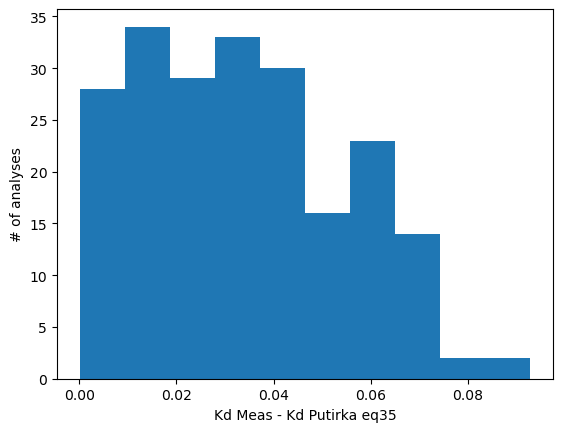

In [24]:
# Firts lets look at the distribution of equilibrium tests
plt.hist(Neave17_Eqtest['Delta_Kd_Put2008'])
plt.xlabel('Kd Meas - Kd Putirka eq35')
plt.ylabel('# of analyses')

In [25]:
# This makes a filtered dataframe, taking only the rows where Delta Kd is < or equal to 0.03
Filtered_KD=Neave17_Eqtest.loc[Neave17_Eqtest['Delta_Kd_Put2008']<=0.03]
Filtered_KD.head()

,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_P_kbar_Iter,Delta_T_K_Iter,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Sample_ID_Liq,Sample_ID_Cpx,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
5,0.901265,1347.469377,False,0.0,0.0,0.015694,0.134249,0.016864,0.017380,0.040861,0.042461,0.184897,0.000000,0.004309,54.100000,0.970000,17.200000,9.800000,0.180000,5.140000,9.820000,2.360000,0.430000,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.575166,0.081464,0.001621,0.087132,0.111862,0.107758,0.024323,0.002916,0.007757,0.0,0.0,0.506755,0.071775,0.001428,0.076768,0.098557,0.189883,0.042861,0.005138,0.006834,0.0,0.0,0.483183,0.483183,51.0,0.57,4.38,7.98,0.19,15.7,20.00,0.19,0.01,0.00,1.883542,0.864397,0.246470,0.791422,0.190650,0.013605,0.000471,0.005944,0.015835,0.000000,0.0,0.116458,0.074192,0.454398,0.129565,0.416037,4.012336,0.416037,0.024202,0.222268,0.098193,0.000000,0.174591,0.778123,0.013605,0,0.060587,0.027935,0.702900,0.203984,0.702900,0.544036,0.024202,0.222268,0.266588,0.240411,0.266588,1.873298,-3.357618,-3.357618,0.253731,0.483183,0.483183,0.012857,5,5,0.250894,0.132338,-0.015694,0.887797,0.184897,0.724287,0.021387,0.745362,0.042461,0.221364,0.017380,0.187120,-0.016864,0.019726,-0.040861,0.0,0.000000,0.023626,0.004309,0.010787,0.002818,0.002818
7,1.999909,1353.364811,False,0.0,0.0,0.006050,0.124685,0.006741,0.067690,0.065817,0.057124,0.191010,0.000000,0.018419,53.200000,0.840000,17.900000,9.860000,0.130000,5.570000,9.960000,2.140000,0.390000,0.0,0.0,3.600000,0.0,0.0,0.0,0.0,0.565749,0.088303,0.001171,0.087689,0.113487,0.112174,0.022062,0.002645,0.006719,0.0,0.0,0.497633,0.077671,0.001030,0.077131,0.099823,0.197336,0.038811,0.004654,0.005910,0.0,0.0,0.501736,0.501736,52.4,0.43,4.49,7.50,0.19,16.4,18.50,0.18,0.01,0.00,1.913935,0.892993,0.229094,0.724003,0.193285,0.012747,0.000466,0.005878,0.011814,0.000000,0.0,0.086065,0.107220,0.483721,0.124097,0.392182,3.984215,0.392182,0.000000,0.229094,0.000000,0.000000,0.235651,0.795827,0.012747,0,0.094473,0.000000,0.629531,0.246278,0.629531,0.498390,-0.032035,0.261129,0.258342,0.258342,0.258342,1.905233,-3.197736,-3.197736,0.257024,0.501736,0.501736,0.001319,7,7,0.252292,0.133657,-0.006050,0.820541,0.191010,0.662697,0.033166,0.686655,0.057124,0.313968,0.067690,0.239537,-0.006

## Calc 4 - how do we compare lots of equations?
- Sure, you could type out every combination of equation, but thats sort of tedious! We have included the most common combinations used in the literature!
- It doesnt return equilibrium tests, because these have terms for P and T, so depends what equations you choose! 

### Some of these are machine learning equations - we need to download these models separatly as they are rather big and PyPI gets annoyed at us (its a free service!)


In [28]:
# Check your version of sklearn - you may need to upgrade if you are on a version earlier than 1.3
import sklearn as s
s.__version__

'1.3.0'

In [34]:
# Now install the machine learning files
!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/v.0.0.4.zip"

     - 0 bytes ? 0:00:00
     - 10.2 kB ? 0:00:00
     \ 38.0 kB 448.1 kB/s 0:00:00
     \ 38.0 kB 448.1 kB/s 0:00:00
     | 86.0 kB 541.5 kB/s 0:00:00
     | 86.0 kB 541.5 kB/s 0:00:00
     / 185.3 kB 802.9 kB/s 0:00:00
     / 236.3 kB 804.6 kB/s 0:00:00
     - 407.6 kB 1.3 MB/s 0:00:00
     - 841.2 kB 2.1 MB/s 0:00:00
     \ 902.6 kB 2.0 MB/s 0:00:00
     \ 1.7 MB 3.5 MB/s 0:00:00
     | 2.1 MB 3.8 MB/s 0:00:00
     / 3.3 MB 5.5 MB/s 0:00:00
     / 4.4 MB 6.8 MB/s 0:00:00
     - 5.7 MB 8.3 MB/s 0:00:00
     - 7.1 MB 9.5 MB/s 0:00:00
     \ 7.5 MB 10.0 MB/s 0:00:00
     \ 7.5 MB 10.0 MB/s 0:00:00
     | 8.6 MB 9.6 MB/s 0:00:00
     | 11.7 MB 24.0 MB/s 0:00:00
     / 12.9 MB 24.9 MB/s 0:00:01
     - 13.4 MB 26.0 MB/s 0:00:01
     - 13.4 MB 26.0 MB/s 0:00:01
     \ 14.2 MB 20.8 MB/s 0:00:01
     \ 14.9 MB 20.1 MB/s 0:00:01
     | 14.9 MB 20.1 MB/s 0:00:01
     | 14.9 MB 20.1 MB/s 0:00:01
     / 16.3 MB 17.8 MB/s 0:00:01
     / 17.2 MB 16.8 MB/s 0:00:01
     - 17.5 MB 19.5 MB/s 0:00:01
 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
All_Exps=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx, liq_comps=Liq)
All_Exps.head()

We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgenson, 2022)","T_K: (Jorgenson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286774,1383.752613,3.468196,1403.935522,2.853015,1381.513759,5.341572,1394.457858,3.928279,1387.077083,7.819698,1469.001701,9.511113,1504.610431,6.607933,7.146713,5.632790,1422.961524,3.542198,1463.190975,5.298549,1384.375455,4.620689,1376.980846,1454.833594,3.915014
1,3.085978,1401.973136,3.279229,1424.006617,2.239211,1397.493766,4.976933,1412.080646,1.485561,1393.530983,5.219646,1472.143295,5.618105,1480.531920,4.063358,4.375427,2.673348,1418.537035,4.243707,1470.807790,5.768426,1417.357273,5.156706,1419.169900,1454.370265,3.660332
2,4.021323,1413.717647,4.126834,1425.346847,3.352921,1410.119985,6.452329,1426.958740,4.830457,1418.097429,7.695214,1478.408115,9.029315,1506.494459,6.649362,7.063053,5.956967,1441.813428,4.503705,1474.012611,5.743663,1414.188182,5.191811,1405.965920,1465.099469,4.662148
3,5.858916,1424.378793,6.044984,1443.814644,4.250855,1415.624124,7.066573,1431.025096,4.825058,1418.737840,7.760858,1480.544153,8.630340,1498.849050,7.003696,7.385131,5.994574,1443.359234,5.661313,1477.641249,6.824120,1426.211818,6.559458,1421.970896,1472.634124,5.780116
4,6.662773,1427.813893,6.879039,1448.565480,5.267612,1420.175502,8.172514,1436.172702,6.467734,1426.741131,9.282411,1485.997501,9.950533,1500.063222,8.540776,8.916346,7.973890,1458.449676,6.495375,1482.118136,7.315460,1425.373636,6.687587,1425.174876,1478.290852,6.895474


### Choose your 3 favourite equations for pressure - and plot them against experimental pressure here


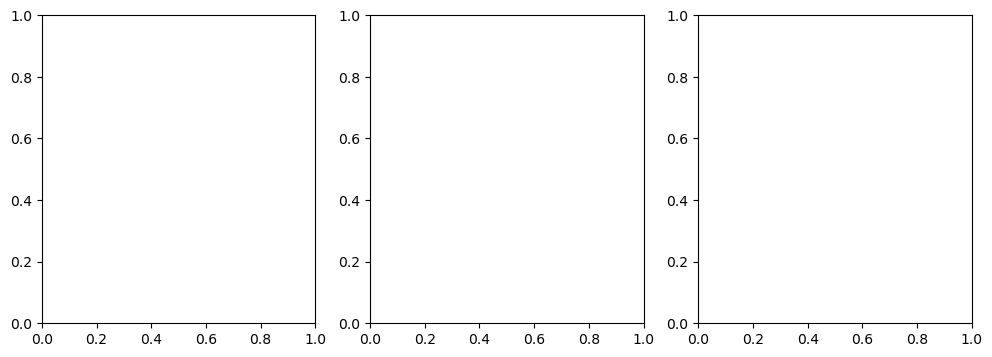

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
# Add the rest of the code here - you can paste from above

## Calc 5 - What can we do in python that is hard elsewhere?
- We can plot our own data amongst the calibration datasets of different models! 

In [36]:
Cali_Dataset_Brugman=pt.return_cali_dataset(model="Brugman2019")
Cali_Dataset_Neave=pt.return_cali_dataset(model="Neave2017")
Cali_Dataset_Wang=pt.return_cali_dataset(model="Wang2021")
Cali_Dataset_Masotta=pt.return_cali_dataset(model="Masotta2013")
Cali_Dataset_Putirka=pt.return_cali_dataset(model="Putirka2008")

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Brugman_2019_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\NeavePutirka_2017_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Wang21_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Masotta_2013_Cali_input.csv
Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Putirka2008_Cali_input.csv


In [37]:
Cali_Dataset_Brugman

,Unnamed: 0,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Sample_ID_Liq,Sample_ID_Cpx,P_kbar,T_K
0,0,74.209343,0.390628,11.708830,3.815584,0.077959,0.185832,1.099168,2.429707,6.082949,0,0.0,0.0,0.0,0.0,0.0,0.0,0.803564,0.003000,0.000715,0.034552,0.012753,0.074714,0.025505,0.042015,0.003182,0.0,0.0,0.703502,0.002626,0.000626,0.030250,0.011165,0.130821,0.044659,0.073566,0.002785,0.0,0.0,0.079881,0.079881,51.182387,0.482412,2.749730,20.859759,0.643945,8.536988,14.493527,0.454298,0.596955,0.000000,1.981014,0.492584,0.675200,0.601055,0.125434,0.034092,0.029476,0.021111,0.014045,0.000000,0.0,0.018986,0.106447,0.278479,0.381719,0.339802,3.974009,0.339802,0.000000,0.675200,0.000000,0.000000,0.303684,0.421803,0.034092,0,0.072355,0.000000,0.528700,0.319542,0.528700,0.219051,-0.081458,0.756658,0.119005,0.119005,0.119005,2.467312,-5.508739,-5.508739,0.187455,0.079881,0.079881,0.068450,0,0,2.04,1248.15
1,1,74.572551,0.392166,12.358204,3.039974,0.009267,0.108167,0.992309,2.280478,6.246884,0,0.0,0.0,0.0,0.0,0.0,0.0,0.809514,0.001750,0.000085,0.027598,0.011542,0.079055,0.023999,0.043255,0.003202,0.0,0.0,0.706192,0.001527,0.000074,0.024075,0.010068,0.137929,0.041871,0.075469,0.002793,0.0,0.0,0.059643,0.059643,50.337208,0.507150,3.723661,19.603674,0.668471,7.998668,16.337319,0.378034,0.445813,0.000000,1.947778,0.461399,0.634372,0.677336,0.169816,0.028361,0.022007,0.021909,0.014761,0.000000,0.0,0.052222,0.117593,0.260221,0.357774,0.382005,3.977738,0.382005,0.000000,0.634372,0.000000,0.000000,0.242318,0.421064,0.028361,0,0.089232,0.000000,0.588104,0.253833,0.588104,0.242780,-0.066531,0.700903,0.087206,0.087206,0.087206,2.287179,-6.141126,-6.141126,0.187318,0.059643,0.059643,0.100112,1,1,2.04,1223.15
2,2,75.540043,0.253821,12.328510,2.138325,0.000000,0.216253,0.991043,2.394757,6.137249,0,0.0,0.0,0.0,0.0,0.0,0.0,0.817491,0.003489,0.000000,0.019352,0.011491,0.078622,0.025124,0.042365,0.002066,0.0,0.0,0.713274,0.003044,0.000000,0.016885,0.010026,0.137198,0.043842,0.073928,0.001803,0.0,0.0,0.152737,0.152737,50.411923,0.165093,1.681400,20.185803,0.688512,6.406445,19.891753,0.372902,0.196168,0.000000,1.978759,0.374874,0.662616,0.836577,0.077783,0.028379,0.009823,0.022891,0.004874,0.000000,0.0,0.021241,0.056542,0.200032,0.353571,0.446397,3.996576,0.446397,0.000000,0.662616,0.000000,0.000000,0.117959,0.361320,0.028379,0,0.028163,0.000000,0.808414,0.114538,0.808414,0.285797,-0.016671,0.679286,0.318653,0.318653,0.318653,2.227187,-6.754009,-6.754009,0.176206,0.152737,0.152737,0.142448,2,2,2.04,1223.15
3,3,74.334879,0.453270,12.174028,3.541246,0.071112,0.108658,0.883723,2.330282,6.102802,0,0.0,0.0,0.0,0.0,0.0,0.0,0.806828,0.001758,0.000654,0.032144,0.010277,0.077866,0.024520,0.042252,0.003701,0.0,0.0,0.704876,0.001536,0.000571,0.028082,0.008979,0.136054,0.042843,0.073826,0.003233,0.0

In [38]:
# If we want to draw a TAS diagram, we can import from here
!pip install git+https://bitbucket.org/jsteven5/tasplot.git


  Cloning https://bitbucket.org/jsteven5/tasplot.git to c:\users\penny\appdata\local\temp\pip-req-build-d3gdmsne
  Resolved https://bitbucket.org/jsteven5/tasplot.git to commit dcd1d9e1f57d8b8554e6d76f6ab83ccc299903e2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for TASplot: filename=TASplot-0.1-py3-none-any.whl size=3107 sha256=e10d03cc9c8185bb1ab1efd4c20d7d6463474c0ba367fd7ccb58b2d3afa1d3fc
  Stored in directory: C:\Users\penny\AppData\Local\Temp\pip-ephem-wheel-cache-91xn3p2c\wheels\5e\b0\41\ac3399fc32525b7dea6939b9e1f3cd39436545ef43bde6b1e0
Successfully built TASplot


  Running command git clone --filter=blob:none --quiet https://bitbucket.org/jsteven5/tasplot.git 'C:\Users\penny\AppData\Local\Temp\pip-req-build-d3gdmsne'

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## We need to import TAS plot

In [39]:
import tasplot

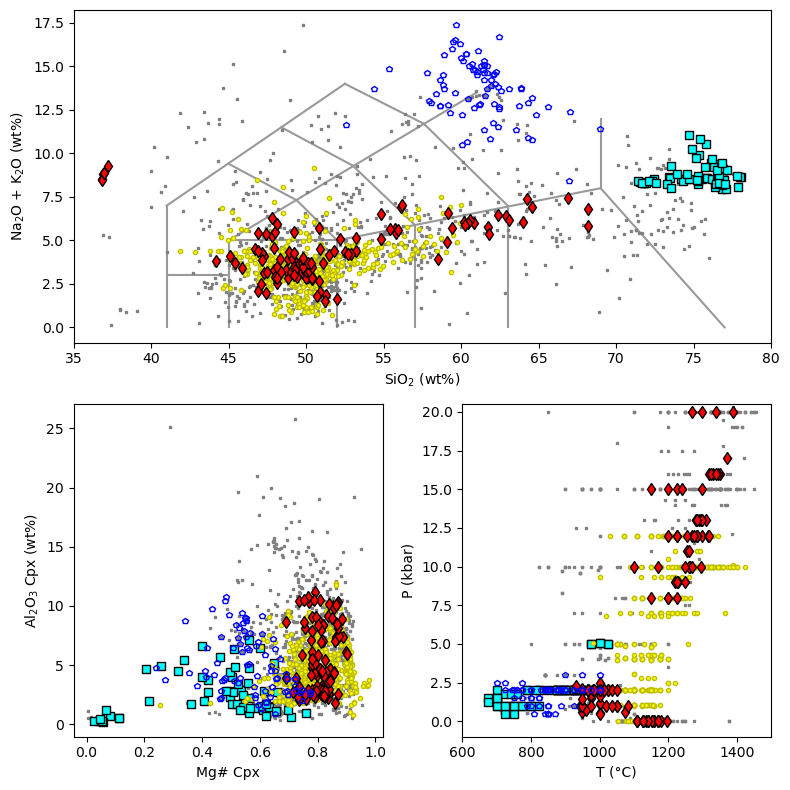

In [41]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharey=True)
figure_mosaic="""
AA
BC
"""
fig, axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(8,8))
# Plot the calibration dataset of different models
axes['A'].plot(Cali_Dataset_Putirka['SiO2_Liq'], Cali_Dataset_Putirka['Na2O_Liq']+Cali_Dataset_Putirka['K2O_Liq'],
         's', mec='grey', mfc='grey', ms=2)
axes['A'].plot(Cali_Dataset_Brugman['SiO2_Liq'], Cali_Dataset_Brugman['Na2O_Liq']+Cali_Dataset_Brugman['K2O_Liq'],
         'sk', mfc='cyan')
axes['A'].plot(Cali_Dataset_Wang['SiO2_Liq'], Cali_Dataset_Wang['Na2O_Liq']+Cali_Dataset_Wang['K2O_Liq'],
         'oy', mfc='yellow', ms=3)
axes['A'].plot(Cali_Dataset_Neave['SiO2_Liq'], Cali_Dataset_Neave['Na2O_Liq']+Cali_Dataset_Neave['K2O_Liq'],
         'dk', mfc='red')
axes['A'].plot(Cali_Dataset_Masotta['SiO2_Liq'], Cali_Dataset_Masotta['Na2O_Liq']+Cali_Dataset_Masotta['K2O_Liq'],
          'pb', mfc='None', ms=4, mew=1)
axes['A'].set_xlim([35, 80])
axes['A'].set_xlabel('SiO$_2$ (wt%)')
axes['A'].set_ylabel('Na$_2$O + K$_2$O (wt%)')

###
axes['B'].plot(Cali_Dataset_Putirka['Mgno_Cpx'], Cali_Dataset_Putirka['Al2O3_Cpx'],
         's', mec='grey', mfc='grey', ms=2)
axes['B'].plot(Cali_Dataset_Brugman['Mgno_Cpx'], Cali_Dataset_Brugman['Al2O3_Cpx'],
         'sk', mfc='cyan')
axes['B'].plot(Cali_Dataset_Wang['Mgno_Cpx'], Cali_Dataset_Wang['Al2O3_Cpx'],
         'oy', mfc='yellow', ms=3)
axes['B'].plot(Cali_Dataset_Neave['Mgno_Cpx'], Cali_Dataset_Neave['Al2O3_Cpx'],
         'dk', mfc='red')
axes['B'].plot(Cali_Dataset_Masotta['Mgno_Cpx'], Cali_Dataset_Masotta['Al2O3_Cpx'],
         'pb', mfc='None', ms=4, mew=1)
#axes['B'].set_xlim([35, 80])
axes['B'].set_xlabel('Mg# Cpx')
axes['B'].set_ylabel('Al$_2$O$_3$ Cpx (wt%)')



axes['C'].plot(Cali_Dataset_Putirka['T_K']-273.15, Cali_Dataset_Putirka['P_kbar'],
         's', mec='grey', mfc='grey', ms=2)
axes['C'].plot(Cali_Dataset_Brugman['T_K']-273.15, Cali_Dataset_Brugman['P_kbar'],
         'sk', mfc='cyan')
axes['C'].plot(Cali_Dataset_Wang['T_K']-273.15, Cali_Dataset_Wang['P_kbar'],
         'oy', mfc='yellow', ms=3)
axes['C'].plot(Cali_Dataset_Neave['T_K']-273.15, Cali_Dataset_Neave['P_kbar'],
         'dk', mfc='red')
axes['C'].plot(Cali_Dataset_Masotta['T_K']-273.15, Cali_Dataset_Masotta['P_kbar'],
         'pb', mfc='None', ms=4, mew=1)

axes['C'].set_ylim([-1, 20.5])
axes['C'].set_xlim([600, 1500])
axes['C'].set_xlabel('T (°C)')

axes['C'].set_ylabel('P (kbar)')


# This is the plot that actually does the TAS lines
tasplot.add_LeMaitre_fields(axes['A'])
for t in axes['A'].texts[:]:
    t.remove()
    #ax1.remove_artist(t)

fig.tight_layout()
fig.savefig('Cali_Dataset_Cpx.png', dpi=200)